In [106]:


import requests                 
from bs4 import BeautifulSoup   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

import datetime as dt
from datetime import date
from scipy import stats
#from pandas.core import datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import warnings
import seaborn as sns


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn import preprocessing


import json
from time import sleep
from datetime import datetime

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix # confusion matrix
from sklearn import metrics

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import gc

In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = 30, 30
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [6]:
#1  conda install -c anaconda lightgbm
#   conda install -c conda-forge r-catboost

# pip install lightgbm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb
import xgboost as xgb
#from catboost import CatBoostRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [9]:
# importing the Jason Data
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize



# Importing the Dataset



In [44]:
train = pd.read_csv('/Users/marcgehring/Desktop/Massey IT/158333/notebooks/ga-customer-revenue-prediction/Google_Encoded_data.csv')
test = pd.read_csv('/Users/marcgehring/Desktop/Massey IT/158333/notebooks/Google_test_final_jason_cleaned_encoded_data_test_full_.csv')
print(train.shape)
print(test.shape)

(6398, 51)
(401589, 51)


In [45]:
# the reading in always placed us one column named Unnamed: 0, which we have to drop
train.drop('Unnamed: 0',inplace=True,axis=1)
test.drop('Unnamed: 0',inplace=True,axis=1)
print(train.shape)
print(test.shape)

(6398, 50)
(401589, 50)


# Implementing the light gbm

In [46]:
# first own one with baysaian optimization model:
# here we can optimize our parameters


In [47]:
test.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'device.browser',
       'device.browserVersion', 'device.browserSize', 'device.operatingSystem',
       'device.operatingSystemVersion', 'device.isMobile',
       'device.mobileDeviceBranding', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.flashVersion',
       'device.language', 'device.screenColors', 'device.screenResolution',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.cityId',
       'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.timeOnSite',
       'totals.sessionQualityDim', 'totals.new

# 1. Preperation of the Data

# First own try

In [48]:
import warnings
import time
warnings.filterwarnings("ignore")
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation

from sklearn.metrics import r2_score

In [64]:
not_used_cols_train = ["visitNumber", "date", "fullVisitorId",  
        "visitId", "visitStartTime", 'total_transactionRevenue', 'totals.totalTransactionRevenue', 'trafficSource.referralPath']

In [65]:
not_used_cols_test = ["visitNumber", "date", "fullVisitorId",  
        "visitId", "visitStartTime", 'totals.transactionRevenue', 'totals.totalTransactionRevenue', 'trafficSource.referralPath']

In [66]:
print(train.shape)
print(test.shape)

(6398, 50)
(401589, 50)


In [58]:
train_alt = pd.read_csv('/Users/marcgehring/Desktop/Massey IT/158333/notebooks/ga-customer-revenue-prediction/Google_reduced_train.csv')
train_alt

,Unnamed: 0,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,...,totals.transactions,total_transactionRevenue,totals.totalTransactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect
0,433,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,9549826748224805897,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508200705,4,1508200705,...,1,15190000,17190000,(not set),google,organic,(not provided),not available in demo dataset,NaN,True
1,550,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,3700714855829972615,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1508192636,11,1508192636,...,1,8000000,13000000,(not set),(direct),(none),NaN,not available in demo dataset,/,NaN
2,555,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,1572225825161580042,"[{'hitNumber': '1', 'time': '0', 'hour': '6', ...",Not Socially Engaged,1508162218,6,1508162218,...,1,57300000,65300000,(not set),google,organic,(not provided),not available in demo dataset,NaN,True
3,597,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,7187192533100162289,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508189401,17,1508189401,...,1,18230000,25230000,(not set),(direct),(none),NaN,not available in demo dataset,/,True
4,619,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,7889233516776348524,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190484,1,1508190484,...,1,12310000,16310000,(not set),(direct),(none),NaN,not available in demo dataset,/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,598995,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171023,5715145524874406344,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1508786788,2,1508786788,...,1,135710000,143710000,(not set),google,organic,(not provided),not available in demo dataset,NaN,True
6394,598996,Referral,"[{'index': '4', 'value': 'North America'}]",20171023,8917475916573639260,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508774504,3,1508774504,...,1,53850000,59850000,(not set),(direct),(none),NaN,not available in demo dataset,/,True
6395,599002,Referral,"[{'index': '4', 'value': 'North America'}]",20171023,5223799864776775611,"[{'hitNumber': '1', 'time': '0', 'hour': '8', ...",Not Socially Engaged,1508771038,1,1508771038,...,2,136800000,180170000,(not set),(direct),(none),NaN,not available in demo dataset,/,NaN
6396,599005,Referral,"[{'index': '4', 'value': 'North America'}]",20171023,8828141200398604996,"[{'hitNumber': '1', 'time': '0', 'hour': '13',...",Not Socially Engaged,1508788879,2,1508788879,...,1,30520000,39520000,(not set),(direct),(none),NaN,not available in demo dataset,/,True


In [67]:
# We were implementing the Loight gbm but we had problems with our result. It looks like we have to use the log to get the needed results for the y values

X_train = train.drop(not_used_cols_train, axis=1)
y_train = train_alt.total_transactionRevenue
X_test = test.drop(not_used_cols_test, axis=1)


In [68]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)

(6398,)
(6398, 42)
(401589, 42)


In [69]:
# splitting up the data for the light gbm 
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

# First impl. Baysaian optimization Model with Cross validation
We are going to use the baysyan optimizaton model to tune our Hyperparamters. Using cross Validation to evaluate the best score. 

In [70]:
#Define R-squared
def lgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds), True
    
dtrain = lgb.Dataset(data=X_train, label=y_train)


def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      
        params = {'application':'regression','num_iterations': 100,
                  'learning_rate':0.01, 'early_stopping_round':50,
                  'metric':'lgb_r2_score'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=17,categorical_feature=[], stratified=False,
                            verbose_eval =None, feval=lgb_r2_score)
       # print(cv_results)
        return np.max(cv_results['r2-mean'])# cv_results

In [71]:
# here we can optimize our parameters

pds = {'num_leaves': (45, 60),
          'feature_fraction': (0.1, 0.9),
          'bagging_fraction': (0.8, 1),
          'max_depth': (9, 13 ),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (30, 50)
          }

In [72]:

optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=7)
                                  

optimizer.maximize(init_points=5, n_iter=15)

#n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
#init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.05217  |  0.8153   |  0.7239   |  10.75    |  44.47    |  0.09782  |  53.08    |
|  2        |  0.03282  |  0.9002   |  0.1576   |  10.07    |  40.0     |  0.06824  |  57.06    |
|  3        |  0.03277  |  0.8762   |  0.1527   |  10.15    |  48.19    |  0.02213  |  51.78    |
|  4        |  0.0261   |  0.9862   |  0.1199   |  11.4     |  49.0     |  0.0238   |  53.23    |
|  5        |  0.03817  |  0.9818   |  0.2065   |  11.09    |  45.01    |  0.06723  |  52.02    |
|  6        |  0.04783  |  0.8      |  0.9      |  9.0      |  30.0     |  0.1      |  45.0     |
|  7        |  0.0489   |  0.8      |  0.9      |  13.0     |  30.0     |  0.07543  |  60.0     |
|  8        |  0.05237  |  0.8017   |  0.8983   |  13.0     |  49.89    |  0.001    |  45.08    |
|  9        |  0.049

In [73]:
optimizer.max['params']

{'bagging_fraction': 0.8016673661726418,
 'feature_fraction': 0.8982516923521278,
 'max_depth': 12.99886728652256,
 'min_child_weight': 49.89072758351694,
 'min_split_gain': 0.001,
 'num_leaves': 45.07747643762981}

# Final Implementation of the Baysaian optimization Model

In [74]:
#Inspiration: https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9

def bayesion_opt_lgbm(X_train, y_train, init_iter=3, n_iters=7, random_state=11, seed = 42, num_iterations = 100):
  dtrain = lgb.Dataset(data=X_train, label=y_train)
  def lgb_r2_score(preds, dtrain):
      labels = dtrain.get_label()
      return 'r2', r2_score(labels, preds), True
  
  def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,bagging_frequency):
        
          params = {'application':'regression','num_iterations': num_iterations,
                 'learning_rate': 0.001, 'early_stopping_round':50,
                    'metric':'lgb_r2_score'} # Default parameters
          params["num_leaves"] = int(round(num_leaves))
          params['feature_fraction'] = max(min(feature_fraction, 1), 0)
          params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
          params['max_depth'] = int(round(max_depth))
          params['min_split_gain'] = min_split_gain
          params['min_child_weight'] = min_child_weight    #ab hier 
          params['bagging_frequency'] = bagging_frequency  
          
            
          cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_r2_score)
         # print(cv_results)  # mal schauen ob das funktioniert. Ansonsten returnen
          return np.max(cv_results['r2-mean'])
  


  pds = {'num_leaves': (40, 300),
            'feature_fraction': (0.1, 0.9),
            'bagging_fraction': (0.6, 1),
            'max_depth': (5, 25),
            'min_split_gain': (0.001, 0.1),
            'min_child_weight': (2, 60),      
            'bagging_frequency': (1, 20)
            
            }

  
  optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    

  optimizer.maximize(init_points=init_iter, n_iter=n_iters)

bayesion_opt_lgbm(X_train, y_train, init_iter=5, n_iters=10, random_state=77, seed = 42, num_iterations = 200)

|   iter    |  target   | baggin... | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.01957  |  0.9676   |  13.2     |  0.703    |  7.786    |  7.065    |  0.07901  |  124.8    |
|  2        |  0.01734  |  0.8164   |  5.564    |  0.5363   |  13.01    |  43.48    |  0.08383  |  193.0    |
|  3        |  0.01983  |  0.7185   |  6.339    |  0.6645   |  13.45    |  5.324    |  0.07496  |  157.6    |
|  4        |  0.01216  |  0.6703   |  1.938    |  0.334    |  6.336    |  45.57    |  0.007313 |  152.3    |
|  5        |  0.01858  |  0.7457   |  3.887    |  0.5374   |  13.87    |  4.092    |  0.08247  |  111.1    |
|  6        |  0.02034  |  0.7602   |  19.78    |  0.6735   |  15.36    |  2.199    |  0.05568  |  300.0    |
|  7        |  0.01131  |  0.6766   |  19.96    |  0.2623   |  24.86    |  5.406    |  0.01796  |  46.83    |
|  8      

In [75]:
best = optimizer.max['params']
best

{'bagging_fraction': 0.8016673661726418,
 'feature_fraction': 0.8982516923521278,
 'max_depth': 12.99886728652256,
 'min_child_weight': 49.89072758351694,
 'min_split_gain': 0.001,
 'num_leaves': 45.07747643762981}

# Now Predicting with the best model
ab hier wieder alles selbst geschrieben

In [83]:
sub = pd.read_csv('/Users/marcgehring/Desktop/Massey IT/158333/notebooks/ga-customer-revenue-prediction/sample_submission_v2.csv')

In [84]:
tr_X, val_X, tr_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [85]:
# now we can set our parameters down for the evaluation 
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "learning_rate" : 0.005,
        "num_leaves" : 45,              
        "bagging_fraction" : 0.8016673661726418,       
        "feature_fraction" : 0.8982516923521278,       
        "bagging_frequency" : 1,        
        "bagging_seed" : 42,
        'max_depth': 13,
        'min_split_gain': 0.001,
        'min_child_weight':43
      }

In [86]:
lgb_training = lgb.Dataset(tr_X, label=tr_y)
lgb_validation = lgb.Dataset(val_X, label=val_y)

In [87]:
evals_result = {}
model = lgb.train(params, lgb_training, num_boost_round=4000, 
                      valid_sets=[lgb_training, lgb_validation], 
                      early_stopping_rounds=500, 
                      verbose_eval=150, 
                      evals_result=evals_result)

Training until validation scores don't improve for 500 rounds.
[150]	training's rmse: 2.29555e+08	valid_1's rmse: 3.36001e+08
[300]	training's rmse: 2.22355e+08	valid_1's rmse: 3.33629e+08
[450]	training's rmse: 2.16831e+08	valid_1's rmse: 3.3243e+08
[600]	training's rmse: 2.13506e+08	valid_1's rmse: 3.32051e+08
[750]	training's rmse: 2.10597e+08	valid_1's rmse: 3.32225e+08
[900]	training's rmse: 2.0811e+08	valid_1's rmse: 3.32311e+08
[1050]	training's rmse: 2.0595e+08	valid_1's rmse: 3.32433e+08
Early stopping, best iteration is:
[578]	training's rmse: 2.13868e+08	valid_1's rmse: 3.32032e+08


# Feauture Importance

In [88]:
# feature importance
#If "split", result contains numbers of times the feature is used in a model.
#    If "gain", result contains total gains of splits which use the feature.



model = lgb.train(params, lgb_training, 5000, 
                      valid_sets=[lgb_training, lgb_validation], 
                      early_stopping_rounds=50, 
                      #verbose_eval=150, 
                      evals_result=evals_result)

print("Features Importance...")
gain = model.feature_importance('gain')
featureimp = pd.DataFrame({'feature':model.feature_name(), 
                   'split':model.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

[1]	training's rmse: 2.4237e+08	valid_1's rmse: 3.42099e+08
Training until validation scores don't improve for 50 rounds.
[2]	training's rmse: 2.42248e+08	valid_1's rmse: 3.42038e+08
[3]	training's rmse: 2.42114e+08	valid_1's rmse: 3.41969e+08
[4]	training's rmse: 2.41985e+08	valid_1's rmse: 3.41898e+08
[5]	training's rmse: 2.41881e+08	valid_1's rmse: 3.4185e+08
[6]	training's rmse: 2.41748e+08	valid_1's rmse: 3.41771e+08
[7]	training's rmse: 2.41619e+08	valid_1's rmse: 3.41701e+08
[8]	training's rmse: 2.41499e+08	valid_1's rmse: 3.41636e+08
[9]	training's rmse: 2.41369e+08	valid_1's rmse: 3.41556e+08
[10]	training's rmse: 2.41241e+08	valid_1's rmse: 3.41482e+08
[11]	training's rmse: 2.41116e+08	valid_1's rmse: 3.41417e+08
[12]	training's rmse: 2.40991e+08	valid_1's rmse: 3.41344e+08
[13]	training's rmse: 2.40891e+08	valid_1's rmse: 3.41314e+08
[14]	training's rmse: 2.4077e+08	valid_1's rmse: 3.41249e+08
[15]	training's rmse: 2.40664e+08	valid_1's rmse: 3.41211e+08
[16]	training's rmse

[160]	training's rmse: 2.28956e+08	valid_1's rmse: 3.35748e+08
[161]	training's rmse: 2.28898e+08	valid_1's rmse: 3.3572e+08
[162]	training's rmse: 2.28839e+08	valid_1's rmse: 3.35695e+08
[163]	training's rmse: 2.28783e+08	valid_1's rmse: 3.35669e+08
[164]	training's rmse: 2.28726e+08	valid_1's rmse: 3.3565e+08
[165]	training's rmse: 2.28679e+08	valid_1's rmse: 3.35637e+08
[166]	training's rmse: 2.28626e+08	valid_1's rmse: 3.35609e+08
[167]	training's rmse: 2.28574e+08	valid_1's rmse: 3.35584e+08
[168]	training's rmse: 2.28522e+08	valid_1's rmse: 3.35567e+08
[169]	training's rmse: 2.28467e+08	valid_1's rmse: 3.35559e+08
[170]	training's rmse: 2.28409e+08	valid_1's rmse: 3.35542e+08
[171]	training's rmse: 2.28346e+08	valid_1's rmse: 3.35527e+08
[172]	training's rmse: 2.28299e+08	valid_1's rmse: 3.35519e+08
[173]	training's rmse: 2.28251e+08	valid_1's rmse: 3.35506e+08
[174]	training's rmse: 2.28196e+08	valid_1's rmse: 3.35489e+08
[175]	training's rmse: 2.2814e+08	valid_1's rmse: 3.35469

[302]	training's rmse: 2.22282e+08	valid_1's rmse: 3.33598e+08
[303]	training's rmse: 2.22241e+08	valid_1's rmse: 3.33586e+08
[304]	training's rmse: 2.2219e+08	valid_1's rmse: 3.33581e+08
[305]	training's rmse: 2.22147e+08	valid_1's rmse: 3.33571e+08
[306]	training's rmse: 2.22108e+08	valid_1's rmse: 3.33558e+08
[307]	training's rmse: 2.22065e+08	valid_1's rmse: 3.33541e+08
[308]	training's rmse: 2.2203e+08	valid_1's rmse: 3.33532e+08
[309]	training's rmse: 2.21988e+08	valid_1's rmse: 3.33515e+08
[310]	training's rmse: 2.21952e+08	valid_1's rmse: 3.33499e+08
[311]	training's rmse: 2.21912e+08	valid_1's rmse: 3.33485e+08
[312]	training's rmse: 2.21865e+08	valid_1's rmse: 3.33485e+08
[313]	training's rmse: 2.21822e+08	valid_1's rmse: 3.33475e+08
[314]	training's rmse: 2.21782e+08	valid_1's rmse: 3.33481e+08
[315]	training's rmse: 2.21746e+08	valid_1's rmse: 3.33465e+08
[316]	training's rmse: 2.21701e+08	valid_1's rmse: 3.33465e+08
[317]	training's rmse: 2.21657e+08	valid_1's rmse: 3.3345

[485]	training's rmse: 2.15932e+08	valid_1's rmse: 3.32278e+08
[486]	training's rmse: 2.15917e+08	valid_1's rmse: 3.32282e+08
[487]	training's rmse: 2.15897e+08	valid_1's rmse: 3.32279e+08
[488]	training's rmse: 2.15886e+08	valid_1's rmse: 3.32279e+08
[489]	training's rmse: 2.15865e+08	valid_1's rmse: 3.32281e+08
[490]	training's rmse: 2.15831e+08	valid_1's rmse: 3.32278e+08
[491]	training's rmse: 2.15809e+08	valid_1's rmse: 3.3228e+08
[492]	training's rmse: 2.15776e+08	valid_1's rmse: 3.32284e+08
[493]	training's rmse: 2.15757e+08	valid_1's rmse: 3.32282e+08
[494]	training's rmse: 2.15746e+08	valid_1's rmse: 3.32282e+08
[495]	training's rmse: 2.15732e+08	valid_1's rmse: 3.3228e+08
[496]	training's rmse: 2.15701e+08	valid_1's rmse: 3.32263e+08
[497]	training's rmse: 2.15691e+08	valid_1's rmse: 3.32262e+08
[498]	training's rmse: 2.15662e+08	valid_1's rmse: 3.32261e+08
[499]	training's rmse: 2.15631e+08	valid_1's rmse: 3.32259e+08
[500]	training's rmse: 2.15618e+08	valid_1's rmse: 3.3225

Features Importance...


In [140]:
important_features = featureimp[featureimp.gain > 0]
important_features.to_csv('Google_Feature_importance.csv')

Text(0, 0.5, 'Feature')

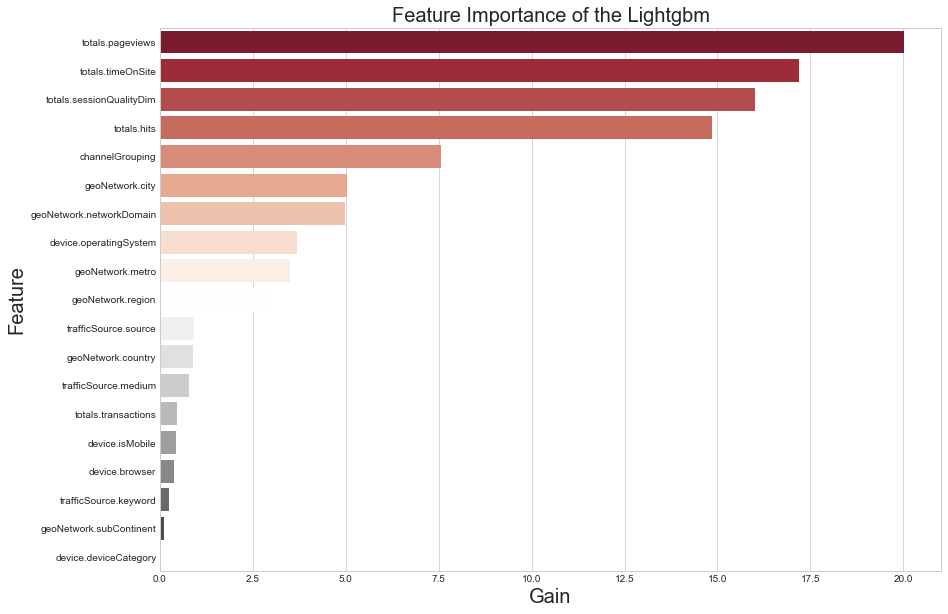

In [90]:
plt.figure(figsize=(14,10))
sns.barplot(x="gain", y="feature", data=important_features, palette = "RdGy")
plt.title('Feature Importance of the Lightgbm',fontsize=20)
plt.xlabel('Gain', fontsize=20)
plt.ylabel('Feature',fontsize=20)


# problem with the Prediction
we had some problems, because when we were using the Encoder. The Visitor Id also got overwritten, therefore we have to check again how we can predict our score. The final model is inside the kernal, with the optimized parameters. We will search up how we can predict the score and submit it within the next days. Due to the fact that we had such big problems with the implementation of the large data Amount, we couldn´t train our model with the whole dataset. We used a really radical dataset, which didn´t give us the best score even with some optimized hyperparameters. 

In [91]:
prediction_lgbt = model.predict(X_test, num_iteration=model.best_iteration) 

In [121]:
url_cvs = '/Users/marcgehring/Desktop/Massey IT/158333/notebooks/ga-customer-revenue-prediction/test_v2.csv'
cols = ['fullVisitorId','date']

test_fullVisitorId = pd.read_csv(url_cvs , usecols=cols)
test_fullVisitorId

,date,fullVisitorId
0,20180511,7460955084541987166
1,20180511,460252456180441002
2,20180511,3461808543879602873
3,20180511,975129477712150630
4,20180511,8381672768065729990
...,...,...
401584,20180907,6701149525099562370
401585,20180907,6154541330147351453
401586,20180907,6013469762773705448
401587,20180907,4565378823441900999


In [122]:
test_fullVisitorId.columns

Index(['date', 'fullVisitorId'], dtype='object')

Problem is that our Submission does not fit, therefore we need to find the right size of the Dataframe:
    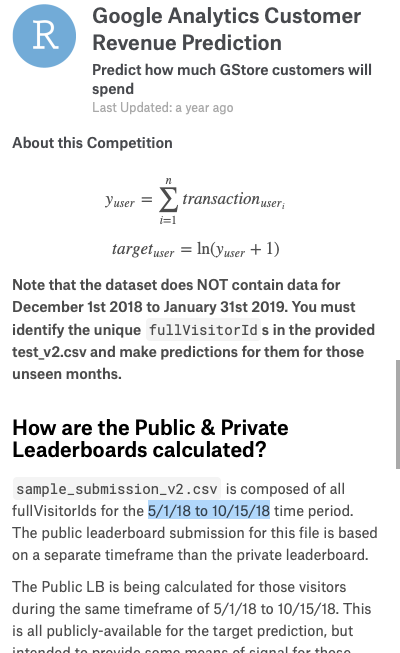

In [123]:
# Now creating or using the dates
test_fullVisitorId["date"] = pd.to_datetime(test_fullVisitorId["date"], format="%Y%m%d") 

In [126]:
len(sub_2)

296530

In [131]:
sub2 = sub

array([19.40971935, 19.47141286, 19.30258428, ..., 19.39850254,
       19.39378606, 19.24589709])

In [135]:
submission = pd.DataFrame()
submission_short = pd.DataFrame()
submission = np.log1p(prediction_lgbt)
len(submission)
submission_short = submission[0:296530]
len(submission_short)

296530

In [138]:
sub_2['PredictedLogRevenue'] = submission_short
sub_2 = sub_2.set_index('fullVisitorId')
sub_2

,PredictedLogRevenue
fullVisitorId,
0000018966949534117,19.409719
0000039738481224681,19.471413
0000073585230191399,19.302584
0000087588448856385,19.481962
0000149787903119437,19.313461
...,...
9999862054614696520,17.767321
9999898168621645223,18.106805
999990167740728398,18.106805


In [139]:
sub_2.to_csv('Google_first_submission.csv')